# <div align="center" Style="color:red"  color="Red"> Heart Stroke Prediction  </div>

# Problem Description


<b><span style='color:red'> As per the World Health Organization (WHO), stroke is the second most common cause of death worldwide, accounting for roughly 11% of all fatalities. Only in the United States, for every 40 seconds, a person is affected with Heart Stroke, and for every 3 min 30 sec a person dies, and 874,613 deaths occurred in the United States in 2019 due to heart-related diseases. If the person is during the initial stage Diagnosed, then he can change his/her lifestyle like food, exercise, etc to avoid severe consequences. This is a significant problem across the globe, based on the information collected, we can estimate the current condition of the person. People who are in the nitty-gritty stage can go through early check-ups to avoid such health conditions. <br>
Based on input characteristics like gender, age, numerous diseases, and smoking status, these details are helpful in categorizing the problem based on their overall information. This will definitely help doctors in examining the basis of stroke.  <br>
 This dataset is used to determine whether a patient is likely to get a stroke or not.
</span><b>

<b><span style='color:blue'> In Simple words we are doing Stroke Prediction chance Yes or No.  </span><b>

<b> --> Installing Necessary ML Libraries<b>

In [ ]:
#!pip install xgboost
#!pip3 install catboost
#!pip3 install scikit-plot


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import scikitplot as skplt



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### <b> Retrieving the data which we have prepared for applying machine learning models<b>
<b> The Data which is cleaned in phase-1 is saved in csv format and is used in this phase-1

In [4]:
#reading the data from csv file
df = pd.read_csv('Strokepred_featured.csv')

list(df.columns)

['Unnamed: 0',
 'age',
 'heart_disease',
 'avg_glucose_level',
 'hypertension',
 'work_type_children',
 'gender',
 'stroke']

In [5]:
#dropping unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender,stroke
0,17.0,0,92.97,0,0,1,0
1,13.0,0,85.81,0,1,1,0
2,55.0,0,89.17,0,0,0,0
3,42.0,0,98.53,0,0,1,0
4,31.0,0,108.89,0,0,1,0


In [7]:
#checking the no of rows and column in data
df.shape

(9722, 7)

In [6]:
#Spliting the data into Input and Target Variable#

In [8]:
y = df['stroke']#Target 
X = df.drop('stroke', axis =1)#Input

In [9]:
#dimensions of X
X.shape

(9722, 6)

In [10]:
y.shape

(9722,)

In [10]:

X.head()

,age,heart_disease,avg_glucose_level,hypertension,work_type_children,gender
0,17.0,0,92.97,0,0,1
1,13.0,0,85.81,0,1,1
2,55.0,0,89.17,0,0,0
3,42.0,0,98.53,0,0,1
4,31.0,0,108.89,0,0,1


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [11]:
#Test- Training Split, we have divided data into 80% training and rest 20% to test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

# <div align="center" Style="color:red"  color="Red">  Applying machine Learning Models  </div>

## <div  Style="color:black"  color="Black">  1.K-Nearest Neighbhor  </div>

<b> When k = 2 </b>

In [12]:
#here we are calling KNN classifier and passing k=2 
kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train,y_train)
import pickle
pickle.dump(KNN, open('model_KNN.pkl', 'wb'))

In [14]:
#preducting the stroke on test and train data
y_pred_kNN_test = kNN.predict(X_test)
y_pred_kNN_train = kNN.predict(X_train)
y_pred_prob_kNN = kNN.predict_proba(X_test)[:, 1]

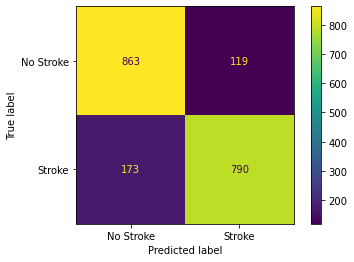

In [15]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confma = confusion_matrix(y_test, y_pred_kNN_test)
cmd = ConfusionMatrixDisplay(confma, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [16]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_kNN_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_kNN_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_kNN))

Testing Accuracy: 0.8498714652956298
Training Accuracy: 0.9331361707599332
ROC AUC Score: 0.9003908356650234


<b> When k = 5 </b>

Testing Accuracy: 0.8652956298200514
Training Accuracy: 0.9008615147229009
ROC AUC Score: 0.9180149228163009


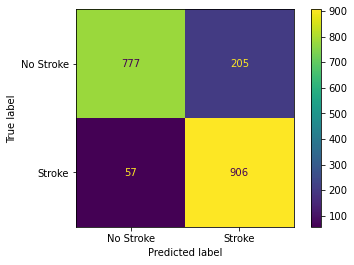

In [17]:
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X_train,y_train)

y_pred_kNN_test = kNN.predict(X_test)
y_pred_kNN_train = kNN.predict(X_train)
y_pred_prob_kNN = kNN.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confma = confusion_matrix(y_test, y_pred_kNN_test)
cmd = ConfusionMatrixDisplay(confma, display_labels=['No Stroke','Stroke'])
cmd.plot()

#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_kNN_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_kNN_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_kNN))

<b> When k = 10 </b>

Testing Accuracy: 0.8524421593830335
Training Accuracy: 0.8802880288028803
ROC AUC Score: 0.9198644130168578


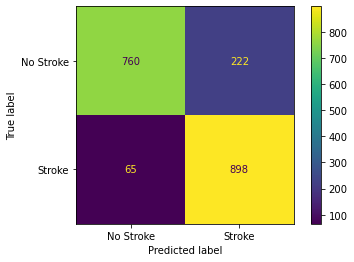

In [18]:
kNN = KNeighborsClassifier(n_neighbors = 10)
kNN.fit(X_train,y_train)

y_pred_kNN_test = kNN.predict(X_test)
y_pred_kNN_train = kNN.predict(X_train)
y_pred_prob_kNN = kNN.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confma = confusion_matrix(y_test, y_pred_kNN_test)
cmd = ConfusionMatrixDisplay(confma, display_labels=['No Stroke','Stroke'])
cmd.plot()

#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_kNN_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_kNN_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_kNN))

<b> When k = 4 </b>

Testing Accuracy: 0.8750642673521851
Training Accuracy: 0.9187347306159187
ROC AUC Score: 0.9155563380728502


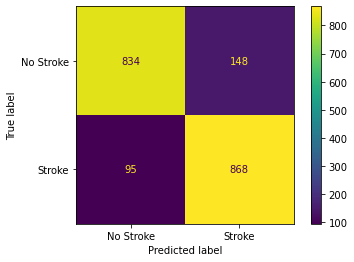

In [19]:
kNN = KNeighborsClassifier(n_neighbors = 4)
kNN.fit(X_train,y_train)

y_pred_kNN_test = kNN.predict(X_test)
y_pred_kNN_train = kNN.predict(X_train)
y_pred_prob_kNN = kNN.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confma = confusion_matrix(y_test, y_pred_kNN_test)
cmd = ConfusionMatrixDisplay(confma, display_labels=['No Stroke','Stroke'])
cmd.plot()

#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_kNN_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_kNN_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_kNN))

In [13]:
kNN = KNeighborsClassifier(n_neighbors = 4)
kNN.fit(X_train,y_train)
import pickle
pickle.dump(kNN, open('model_KNN.pkl', 'wb'))

In [20]:
#getting more details such as precision , recall and f11-score based upon confusion matrix
print(classification_report(y_test, y_pred_kNN_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       982
           1       0.85      0.90      0.88       963

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945



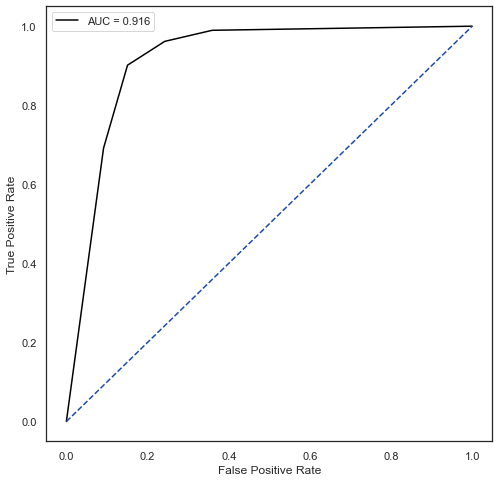

In [21]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_kNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

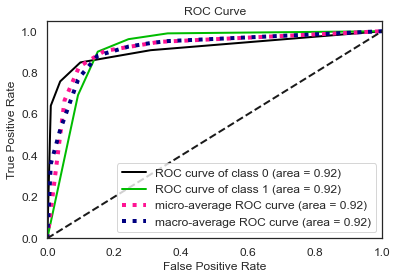

In [22]:
skplt.metrics.plot_roc(y_test, kNN.predict_proba(X_test))
plt.title('ROC Curve')
plt.show()

## <div  Style="color:black"  color="Black">  2.Naive Bayes  </div>


In [14]:
#calling GaussianNB() and passing train , test Data
GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)

GaussianNB()

In [ ]:
import pickle
pickle.dump(GaussianNB, open('model_NB.pkl', 'wb'))

In [24]:
#Predicting Stroke label for both test and train
y_pred_GNB_test = GaussianNB.predict(X_test)
y_pred_GNB_train = GaussianNB.predict(X_train)
y_pred_prob_GNB = GaussianNB.predict_proba(X_test)[:, 1]

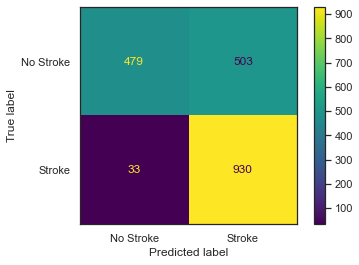

In [25]:
#Printing Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confgn = confusion_matrix(y_test, y_pred_GNB_test)
cmd = ConfusionMatrixDisplay(confgn, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [26]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_GNB_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_GNB_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_GNB))

Testing Accuracy: 0.7244215938303342
Training Accuracy: 0.7304873344477305
ROC AUC Score: 0.8261944492029956


In [27]:
#Getting more values like recall , f1-score and precision based upon Confusion Matrix
print(classification_report(y_test, y_pred_GNB_test))

              precision    recall  f1-score   support

           0       0.94      0.49      0.64       982
           1       0.65      0.97      0.78       963

    accuracy                           0.72      1945
   macro avg       0.79      0.73      0.71      1945
weighted avg       0.79      0.72      0.71      1945



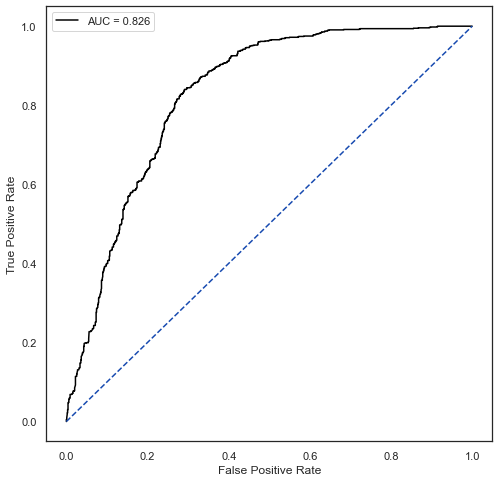

In [28]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_GNB)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## <div  Style="color:black"  color="Black">  3.Support Vector Machines  </div>



In [14]:
#calling SVC method and passing training and test data 
SVM = SVC(probability = True)
SVM.fit(X_train,y_train)
import pickle
pickle.dump(SVM, open('model_svm.pkl', 'wb'))

In [30]:
#predicting Stroke label using both train and test train 
y_pred_SVM_test = SVM.predict(X_test)
y_pred_SVM_train = SVM.predict(X_train)
y_pred_prob_SVM = SVM.predict_proba(X_test)[:, 1]

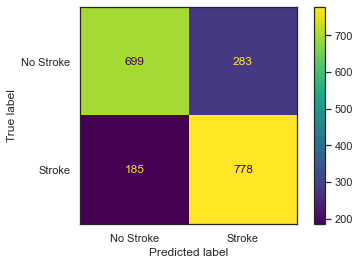

In [31]:
#Printing Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confsv = confusion_matrix(y_test, y_pred_SVM_test)
cmd = ConfusionMatrixDisplay(confsv, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [32]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_SVM_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_SVM_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_SVM))

Testing Accuracy: 0.7593830334190231
Training Accuracy: 0.7635334962067636
ROC AUC Score: 0.8425839567035296


In [33]:
#priting precision , recall and f1-score
print(classification_report(y_test, y_pred_SVM_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       982
           1       0.73      0.81      0.77       963

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



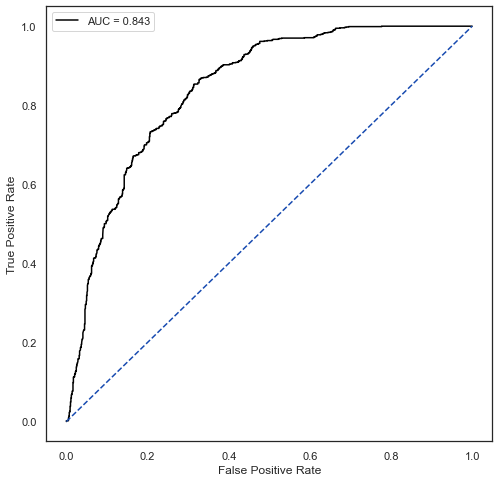

In [34]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_SVM)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## <div  Style="color:black"  color="Black">  4.Random Forest  </div>

In [10]:
#here we are usig RandomForestClassifier method to build random forest model 
RFC = RandomForestClassifier(n_estimators= 100)
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
import pickle
pickle.dump(RFC, open('model.pkl', 'wb'))

In [36]:
#predicting the label for stroke for both test and train data
y_pred_RFC_test = RFC.predict(X_test)
y_pred_RFC_train = RFC.predict(X_train)
y_pred_prob_RFC = RFC.predict_proba(X_test)[:, 1]

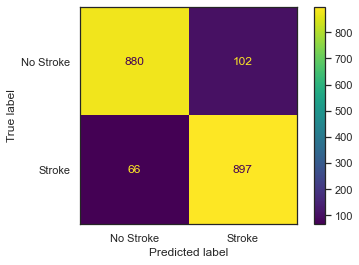

In [37]:
#Displaying confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confsv = confusion_matrix(y_test, y_pred_RFC_test)
cmd = ConfusionMatrixDisplay(confsv, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [38]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_RFC_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_RFC_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_RFC))

Testing Accuracy: 0.913624678663239
Training Accuracy: 0.9854699755689855
ROC AUC Score: 0.9662169307133808


In [39]:
#getting precision , recall and f1-score values
print(classification_report(y_test, y_pred_RFC_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       982
           1       0.90      0.93      0.91       963

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



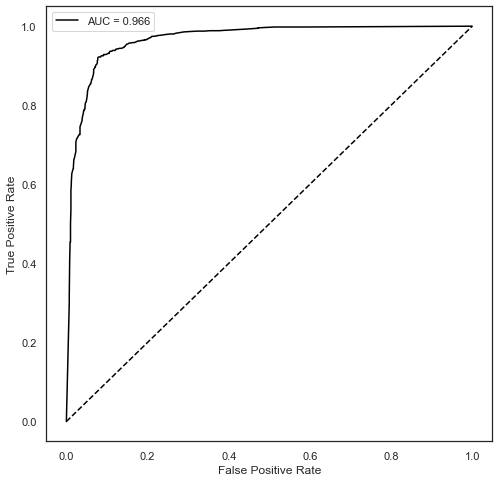

In [41]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_RFC)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'Black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## <div  Style="color:black"  color="Black">  5.CatBoost  </div>

In [7]:
CBC = CatBoostClassifier(verbose= 0)
CBC.fit(X_train,y_train)

In [9]:
import pickle
pickle.dump(CBC, open('model.pkl', 'wb'))

In [8]:
#predicting the label for stroke for both test and train data
y_pred_CBC_test = CBC.predict(X_test)
y_pred_CBC_train = CBC.predict(X_train)
y_pred_prob_CBC = CBC.predict_proba(X_test)[:, 1]

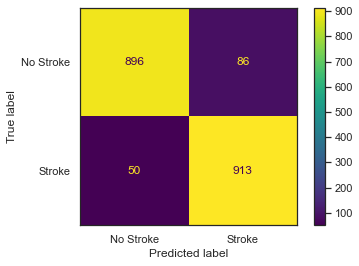

In [44]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confsv = confusion_matrix(y_test, y_pred_CBC_test)
cmd = ConfusionMatrixDisplay(confsv, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [45]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_CBC_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_CBC_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_CBC))

Testing Accuracy: 0.9300771208226221
Training Accuracy: 0.9474090266169474
ROC AUC Score: 0.9773789054486467


In [46]:
#getting values for precision , recall and f1-score 
print(classification_report(y_test, y_pred_CBC_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       982
           1       0.91      0.95      0.93       963

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



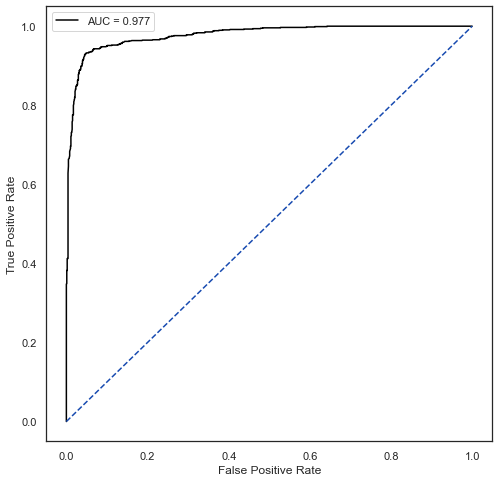

In [47]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_CBC)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## <div  Style="color:black"  color="Black">  6.Logistic Regression  </div>



In [48]:
#calling logisticregression method and fitting model by passing traing data set
LOR = LogisticRegression()
LOR.fit(X_train,y_train)

LogisticRegression()

In [49]:
#predicting stroke label for both test and train data
y_pred_LOR_test = LOR.predict(X_test)
y_pred_LOR_train = LOR.predict(X_train)
y_pred_prob_LOR = LOR.predict_proba(X_test)[:, 1]

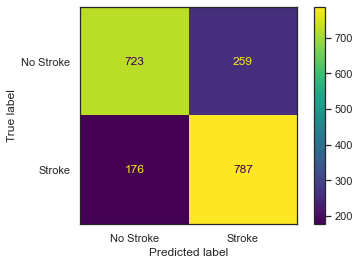

In [50]:
#printing confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confsv = confusion_matrix(y_test, y_pred_LOR_test)
cmd = ConfusionMatrixDisplay(confsv, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [51]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_LOR_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_LOR_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_LOR))

Testing Accuracy: 0.7763496143958869
Training Accuracy: 0.7915648707727916
ROC AUC Score: 0.8557186152404761


In [52]:
#getting precision , recall and f1-score from confusion matrix
print(classification_report(y_test, y_pred_LOR_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       982
           1       0.75      0.82      0.78       963

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



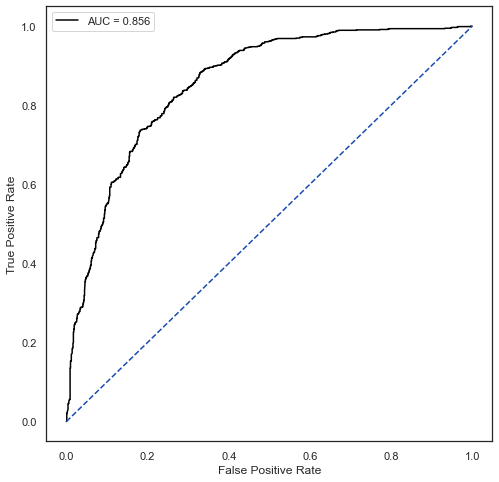

In [53]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_LOR)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'black', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## <div  Style="color:black"  color="Black"> 7.Decision Tree  </div>

In [54]:
#calling DecisionTreeClassifier to create decision tree
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
#predicting stroke label for both test and training data set
y_pred_DTC_test = DTC.predict(X_test)
y_pred_DTC_train = DTC.predict(X_train)
y_pred_prob_DTC = DTC.predict_proba(X_test)[:, 1]

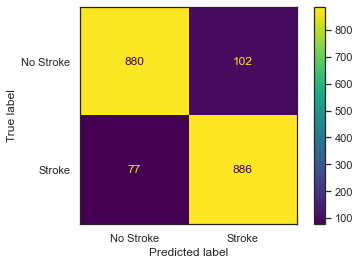

In [56]:
#priting confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confsv = confusion_matrix(y_test, y_pred_DTC_test)
cmd = ConfusionMatrixDisplay(confsv, display_labels=['No Stroke','Stroke'])
cmd.plot()

In [57]:
#Accuracy
print('Testing Accuracy:', accuracy_score(y_test, y_pred_DTC_test))
print('Training Accuracy:', accuracy_score(y_train, y_pred_DTC_train))
#ROC-AUC Score#
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_DTC))

Testing Accuracy: 0.9079691516709512
Training Accuracy: 0.9854699755689855
ROC AUC Score: 0.9139405456048965


In [58]:
print(classification_report(y_test, y_pred_DTC_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       982
           1       0.90      0.92      0.91       963

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



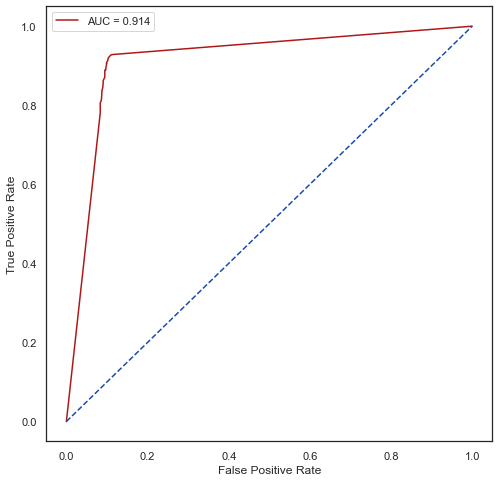

In [59]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_DTC)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()